In [ ]:
#sentiment analysis for twitter tweets


In [ ]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
combined=train.append(test,ignore_index=True)

<ipython-input-3-a2c34858b47d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined=train.append(test,ignore_index=True)


In [ ]:
def remove_pattern(input_text,pattern):
  r=re.findall(pattern,input_text)
  for i in r :
    input_text =re.sub(i,'',input_text)
  return input_text

In [ ]:
combined['tidy tweet']=np.vectorize(remove_pattern)(combined['tweet'],'@[\w]*')
combined.head()

,id,label,tweet,tidy tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
combined['tidy tweet']=combined['tidy tweet'].str.replace('[^A-Za-z#]',' ')
combined

<ipython-input-6-25c8559bb79e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combined['tidy tweet']=combined['tidy tweet'].str.replace('[^A-Za-z#]',' ')


,id,label,tweet,tidy tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm gt
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling like a mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned today in #ohio omg amp used words like assets amp liability never once did #clinton say thee word #radicalization
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happy at work conference right mindset leads to culture of development organizations #work #mindset


In [ ]:
combined['tidy tweet']=combined['tidy tweet'].apply(lambda x :' '.join([i for i in x.split(' ') if len(i)>3]))
combined

,id,label,tweet,tidy tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling like mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned today #ohio used words like assets liability never once #clinton thee word #radicalization
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happy work conference right mindset leads culture development organizations #work #mindset


In [ ]:
tokenized_tweets=combined['tidy tweet'].apply(lambda x :x.split(' '))

In [ ]:
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweets=tokenized_tweets.apply(lambda x :[stemmer.stem(i) for i in x])
combined['tidy tweet']=[' '.join(i) for i in tokenized_tweets]
combined.head()

,id,label,tweet,tidy tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [ ]:
all_words=' '.join(x for x in combined['tidy tweet'])

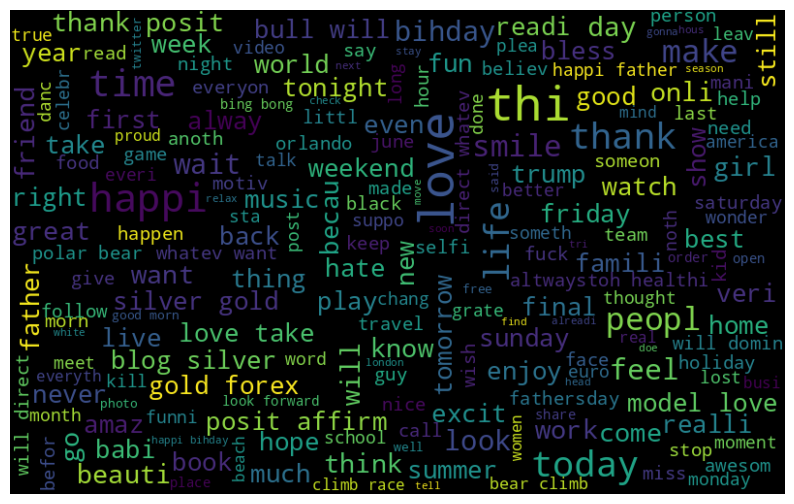

In [ ]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=20,max_font_size=50).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

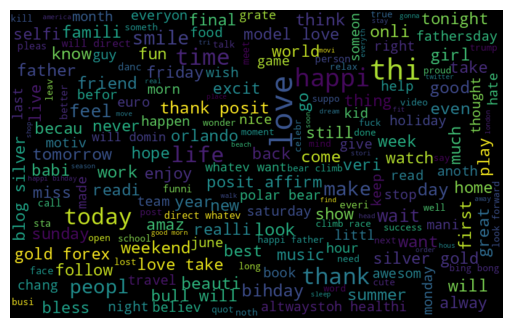

In [ ]:
general_tweets=' '.join(x for x in combined['tidy tweet'][combined['label']==0])
wordcloud=WordCloud(width=800,height=500,random_state=20,max_font_size=50).generate(general_tweets)
plt.figure(figsize=(7,4))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

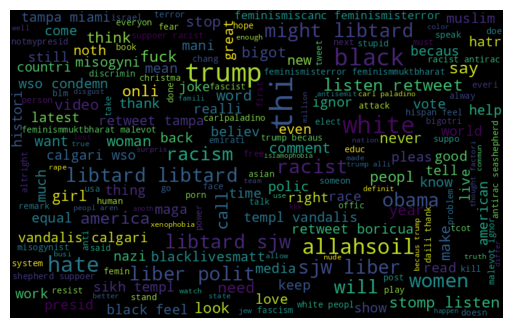

In [ ]:
hate_tweets=' '.join(x for x in combined['tidy tweet'][combined['label']==1])
wordcloud=WordCloud(width=800,height=500,random_state=20,max_font_size=50).generate(hate_tweets)
plt.figure(figsize=(7,4))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def find_hashtags(text):
   hashtags=re.findall(r'#(\w+)',text)
   return hashtags

In [ ]:
hashtags=find_hashtags(all_words)
general_hashtags=find_hashtags(general_tweets)
hate_hashtags=find_hashtags(hate_tweets)

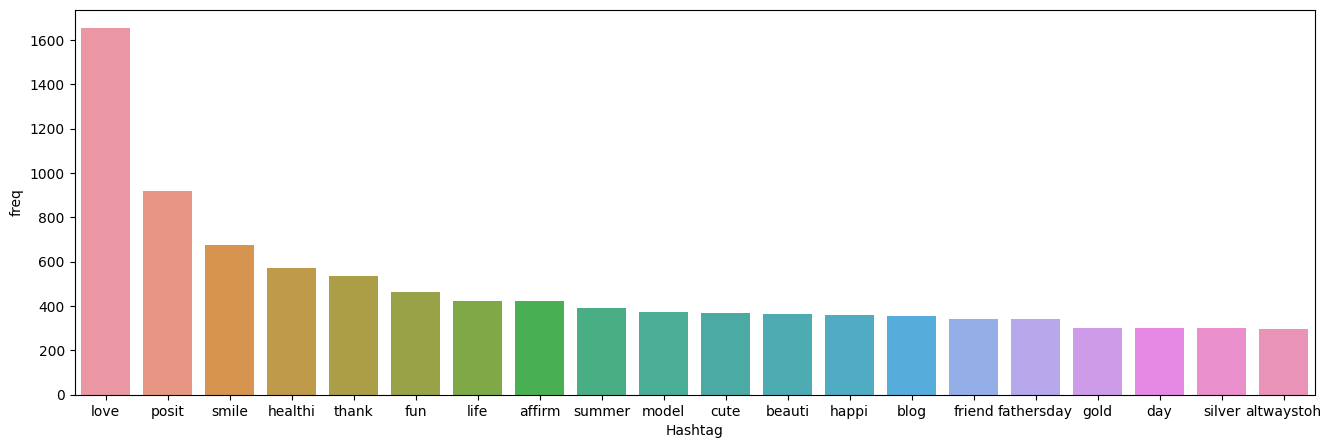

In [ ]:
occurance=nltk.FreqDist(general_hashtags)
freq_data=pd.DataFrame({'Hashtag':list(occurance.keys()),'freq':list(occurance.values())})
n_largest=freq_data.nlargest(columns='freq',n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=n_largest,x='Hashtag',y='freq')
plt.show()

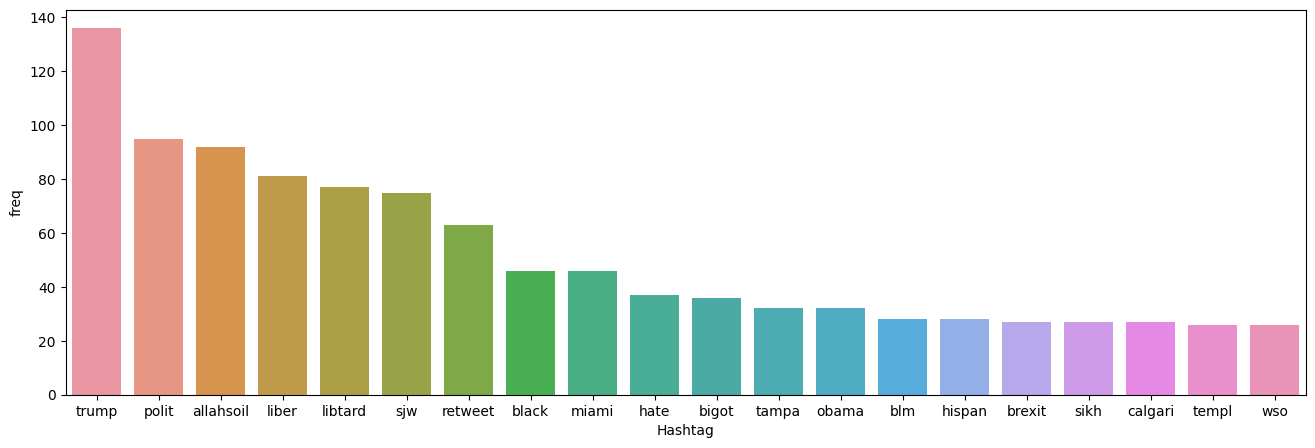

In [ ]:
occurance=nltk.FreqDist(hate_hashtags)
freq_data=pd.DataFrame({'Hashtag':list(occurance.keys()),'freq':list(occurance.values())})
n_largest=freq_data.nlargest(columns='freq',n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=n_largest,x='Hashtag',y='freq')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(combined['tidy tweet'])
bow.shape

(49159, 1000)

In [ ]:
feature_names=bow_vectorizer.get_feature_names_out()
df=pd.DataFrame(bow.toarray(),columns=feature_names)
df

,abl,absolut,accept,account,act,action,activ,actor,actual,adapt,...,yay,yeah,year,yesterday,yoga,york,young,youth,youtub,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combined['tidy tweet'])
tfidf.shape

(49159, 1000)

In [ ]:
feature_names1=tfidf_vectorizer.get_feature_names_out()
df1=pd.DataFrame(tfidf.toarray(),columns=feature_names1)
len(combined['tidy tweet'])

49159

In [ ]:
from gensim.models import Word2Vec
tockenized_tweet=combined['tidy tweet'].apply(lambda x:x.split())
model_w2v=Word2Vec(tockenized_tweet,vector_size=200,window=5,min_count=2,sg=1,hs=0,negative=10,workers=2,seed=34)
model_w2v.train(tockenized_tweet,total_examples=len(combined['tidy tweet']),epochs=20)
model_w2v.wv.most_similar(positive='dinner')

[('#avocado', 0.5453459620475769),
 ('#biall', 0.5396698713302612),
 ('spaghetti', 0.5354899764060974),
 ('cookout', 0.5336721539497375),
 ('burrito', 0.5183222889900208),
 ('#cellar', 0.5158093571662903),
 ('enrout', 0.5155338048934937),
 ('#bihdaydinn', 0.5155158042907715),
 ('#foodcoma', 0.5149928331375122),
 ('dess', 0.5107846856117249)]

In [ ]:
def word_vector(tockens,size):
  vec=np.zeros(size).reshape(1,size)
  count=0
  for word in tockens:
    try:
      vec+=model_w2v.wv[word].reshape((1,size))
      count+=1
    except KeyError:
      continue
  if count!=0:
    vec/=count
    return vec
wordvec_arrays=np.zeros((len(tockenized_tweet),200))
for i in range(len(tockenized_tweet)):
  wordvec_arrays[i,:]=word_vector(tockenized_tweet[i],200)
  wordvec_df=pd.DataFrame(wordvec_arrays)
wordvec_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.007862,-0.469133,0.280825,0.047088,-0.366575,-0.114162,-0.143492,-0.270240,0.173636,-0.150907,...,-0.005532,-0.105581,-0.215129,0.059595,0.328044,-0.043446,-0.094551,-0.001907,0.035407,0.061706
1,0.128646,-0.233379,0.144951,0.048498,-0.235030,0.195179,-0.180817,-0.064313,0.080477,0.073567,...,0.042656,-0.092869,0.033425,-0.105000,-0.010412,0.047725,-0.010493,-0.349317,0.076201,0.134634
2,-0.041026,-0.630299,0.042603,-0.275812,-0.069108,0.361065,0.029122,0.087432,0.341877,-0.233387,...,0.167917,-0.167615,-0.285718,0.151985,0.136642,0.334518,-0.052156,-0.132328,-0.112996,0.317925
3,0.005029,-0.100330,0.051063,0.023457,-0.106518,-0.011478,-0.458432,-0.249276,0.342216,-0.364476,...,-0.105770,-0.030927,-0.004268,0.176812,0.404995,0.089966,-0.090755,-0.178664,0.001493,-0.060009
4,-0.158267,-0.507473,-0.029129,-0.236933,-0.271818,-0.139655,-0.143548,-0.213846,0.586907,-0.036443,...,-0.353563,-0.021569,0.440847,-0.052408,-0.174579,0.310814,-0.224643,-0.483157,-0.066749,0.120054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.068065,-0.439258,0.544955,0.237225,0.082341,-0.066881,0.041894,0.422577,0.288607,0.452856,...,0.298450,-0.078455,-0.027119,-0.522814,-0.013033,-0.033561,0.464699,-0.266338,-0.299328,-0.049916
49155,0.106718,-0.336623,0.299239,0.036031,-0.316567,0.014546,-0.084169,-0.274171,0.158538,0.031328,...,0.059713,-0.046501,0.090241,0.134852,0.245020,0.073010,-0.105130,-0.075793,0.122237,0.237520
49156,0.021032,-0.244886,0.147477,0.243219,-0.209652,0.292433,-0.100662,0.060512,0.325589,0.152341,...,0.211205,-0.228506,-0.069620,-0.012729,0.026859,0.263569,-0.122395,-0.343929,-0.042868,0.177893
49157,-0.080555,-0.384617,0.233423,0.048100,-0.190206,-0.416318,-0.191809,0.205609,0.201759,0.231709,...,0.227337,-0.074070,-0.480923,-0.224687,0.115873,0.196380,0.048584,-0.032223,0.087153,0.048369


In [ ]:
from tqdm import tqdm
tqdm.pandas(desc='progress-bar')
from gensim.models.doc2vec import TaggedDocument
def add_label(twt):
  output=[]
  for i ,s in zip(twt.index,twt):
    output.append(TaggedDocument(words=s,tags=['tweet_'+str(i)]))
  return output
labled_tweets=add_label(tockenized_tweet)
labled_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 TaggedDocument(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [ ]:
from gensim.models import Doc2Vec
model_d2v=Doc2Vec(dm=1,dm_mean=1,vector_size=200,window=5,negative=7,min_count=5,workers=3,alpha=0.1,seed=23)
model_d2v.build_vocab([i for i in tqdm(labled_tweets)])
model_d2v.train(labled_tweets,total_examples=len(combined['tidy tweet']),epochs=15)
docvec_arrays=np.zeros((len(tockenized_tweet),200))
for i in range(len(combined)):
  docvec_arrays[i,:]=model_d2v.docvecs[i].reshape((1,200))
docvec_df=pd.DataFrame(docvec_arrays)
docvec_df.shape


100%|██████████| 49159/49159 [00:00<00:00, 1288230.86it/s]


(49159, 200)

In [ ]:
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
xtrain_bow,xvalid_bow,ytrain_bow,yvalid_bow=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)
lg_model=LogisticRegression()
lg_model.fit(xtrain_bow,ytrain_bow)
prediction=lg_model.predict_proba(xvalid_bow)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid_bow,prediction_int)

0.5303408146300915